## 【問題1】K-meansクラスの作成
非階層クラスタリングの手法であるK-meansのクラスを作成してください。名前はScratchKMeansとしてください。

教師なし学習であるクラスタリングになるため、ここまでの回帰や分類とは異なるパイプラインを作成することになります。

メソッドやパラメータなどはscikit-learnを参考にしてください。

sklearn.cluster.KMeans — scikit-learn 0.20.0 documentation

検証段階ではJupyter Notebook上で書いていき、最終的にはpyファイルにモジュールとしてまとめてください。

クラスタリングのための人工データセット
クラスタリングを実験するための人工データセットを作成するコードを用意しました。スクラッチの過程で利用してください。

このmake_blobs関数は正解ラベルも出力してますが、今回は使用しません。使用しないことを明示するために、 _（アンダースコア） で受け取っています。

SSE (Sum of squared errors)は以下で表される。
$$
SSE = \sum_{n=1}^{N}\sum_{k=1}^{K}r_{nk}||X_{n}-\mu_{k}||^{2}
$$

$n$: index of data samples<br>
$k$: index of clusters<br>
$X_{n}$: data of n-th sample<br>
$\mu_{k}$: central point of cluster k<br>
$r_{nk}$: 1 if $X_{n}$ belongs to cluster $k$, else 0<br>


In [171]:
#テストデータ読み込み
import numpy as np
from sklearn.datasets import make_blobs
X, _ = make_blobs(n_samples=100, n_features=2, centers=4, cluster_std=0.5, shuffle=True, random_state=0)

In [172]:
X[:10]

array([[ 0.72086751,  3.71347124],
       [-1.89468423,  7.96898545],
       [ 1.35678894,  4.36462484],
       [ 1.05374379,  4.49286859],
       [ 1.59141542,  4.90497725],
       [ 0.78260667,  4.15263595],
       [-1.95751686,  3.87291474],
       [-0.77354537,  7.87923564],
       [ 0.12313498,  5.27917503],
       [-1.43284669,  7.71577043]])

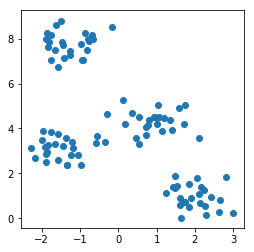

In [173]:
#dataを見てみる
import matplotlib.pyplot as plt
fig, ax = plt.subplots(1, 1, figsize=(4, 4))
ax = plt.scatter(X[:, 0], X[:, 1])

#4個っぽいのでn_neighbors = 4 としてみる
plt.show()

In [174]:
#具体例でイメージの把握をする。
#muを初期化
#cluster数 = 5で
n_clusters = 5

mu_idx = np.array([np.random.randint(0,X.shape[0]) for i in range(5)])
print(mu_idx)

mu = X[mu_idx] 
print(mu)

[58  8 27 97  7]
[[ 2.23345072  1.25095024]
 [ 0.12313498  5.27917503]
 [ 0.802314    4.38196181]
 [-1.56102482  3.77455362]
 [-0.77354537  7.87923564]]


In [175]:
v0 = X-mu[0, :]
v1 = X-mu[1, :]
v2 = X-mu[2, :]
v3 = X-mu[3, :]
v4 = X-mu[4, :]
print(v0.shape)
print(v0[:10])

(100, 2)
[[-1.51258321  2.46252099]
 [-4.12813495  6.71803521]
 [-0.87666178  3.11367459]
 [-1.17970693  3.24191834]
 [-0.6420353   3.65402701]
 [-1.45084405  2.90168571]
 [-4.19096758  2.62196449]
 [-3.00699609  6.62828539]
 [-2.11031574  4.02822478]
 [-3.66629741  6.46482018]]


In [176]:
import math
#各点X_nからmu_kまでの距離d
d0 = v0*v0
d1 = v1*v1
d2 = v2*v2
d3 = v3*v3
d4 = v4*v4

d0 = ((d0[:, 0] + d0[:, 1])**(1/2)).reshape(-1, 1)
d1 = ((d1[:, 0] + d1[:, 1])**(1/2)).reshape(-1, 1)
d2 = ((d2[:, 0] + d2[:, 1])**(1/2)).reshape(-1, 1)
d3 = ((d3[:, 0] + d3[:, 1])**(1/2)).reshape(-1, 1)
d4 = ((d4[:, 0] + d4[:, 1])**(1/2)).reshape(-1, 1)

d = d0
d = np.concatenate([d, d1], axis=1)
d = np.concatenate([d, d2], axis=1)
d = np.concatenate([d, d3], axis=1)
d = np.concatenate([d, d4], axis=1)
d[:10]

array([[2.88996844, 1.6759214 , 0.67343387, 2.28270972, 4.42570479],
       [7.88501713, 3.36253989, 4.48782108, 4.2076819 , 1.12472546],
       [3.2347342 , 1.53567709, 0.55474591, 2.97688111, 4.10984347],
       [3.44989029, 1.21832285, 0.27480402, 2.71163996, 3.84791729],
       [3.71000306, 1.51521332, 0.94669224, 3.34899045, 3.79990164],
       [3.24418378, 1.3053709 , 0.23017109, 2.37393235, 4.03845941],
       [4.94357229, 2.51131043, 2.80638474, 0.40851052, 4.17760645],
       [7.27847462, 2.7503365 , 3.83591671, 4.17953805, 0.        ],
       [4.54752981, 0.        , 1.12528916, 2.2583799 , 2.7503365 ],
       [7.43206813, 2.89103375, 4.01375426, 3.94330059, 0.67926365]])

In [177]:
#各点X_nに対して、最も近いmu_kのindex k
min_idx = d.argmin(1)
min_idx

array([2, 4, 2, 2, 2, 2, 3, 4, 1, 4, 4, 4, 4, 4, 4, 0, 0, 3, 3, 0, 2, 4,
       3, 0, 2, 3, 3, 2, 0, 0, 0, 4, 0, 0, 3, 2, 4, 0, 4, 3, 2, 3, 4, 3,
       3, 4, 0, 3, 2, 2, 2, 0, 3, 3, 3, 4, 4, 0, 0, 4, 4, 0, 0, 2, 0, 4,
       3, 3, 0, 2, 4, 0, 2, 4, 2, 2, 3, 3, 0, 0, 0, 4, 3, 2, 0, 3, 0, 0,
       2, 2, 2, 3, 2, 3, 3, 4, 4, 3, 4, 1])

In [178]:
#mu更新
for i in range(n_clusters):
        print([np.array(X[min_idx == i]).mean(axis=0)])
        mu[i, :] = np.array(X[min_idx == i]).mean(axis=0)
        print(mu)
        print(X[min_idx == i].shape)

[array([1.99186903, 0.96561071])]
[[ 1.99186903  0.96561071]
 [ 0.12313498  5.27917503]
 [ 0.802314    4.38196181]
 [-1.56102482  3.77455362]
 [-0.77354537  7.87923564]]
(25, 2)
[array([-0.08854492,  4.95488583])]
[[ 1.99186903  0.96561071]
 [-0.08854492  4.95488583]
 [ 0.802314    4.38196181]
 [-1.56102482  3.77455362]
 [-0.77354537  7.87923564]]
(2, 2)
[array([1.01398702, 4.26996419])]
[[ 1.99186903  0.96561071]
 [-0.08854492  4.95488583]
 [ 1.01398702  4.26996419]
 [-1.56102482  3.77455362]
 [-0.77354537  7.87923564]]
(23, 2)
[array([-1.47935679,  3.11716896])]
[[ 1.99186903  0.96561071]
 [-0.08854492  4.95488583]
 [ 1.01398702  4.26996419]
 [-1.47935679  3.11716896]
 [-0.77354537  7.87923564]]
(25, 2)
[array([-1.26811733,  7.76378266])]
[[ 1.99186903  0.96561071]
 [-0.08854492  4.95488583]
 [ 1.01398702  4.26996419]
 [-1.47935679  3.11716896]
 [-1.26811733  7.76378266]]
(25, 2)


In [179]:
import math
import sys
#距離
def get_norm(pnt, std):
        #基準点から目標点へのベクトル
        vec = pnt - std
        #特徴量のノルム
        dst = ((vec * vec).sum(axis=1)).reshape(-1,1)
        return dst
    
def is_belonging_to_cluster(d, n_clusters):
        min_idx = d.argmin(1)
        r = np.zeros((len(d), 0))
        for i in range(n_clusters):
                r = np.concatenate([r, (min_idx == i).reshape(-1, 1)],axis=1)
        return r

def update_centroid(mu, r , n_neighbors):
        
        for i in range(n_neighbors):
                mu[i, :] = (X * r[:, i].reshape(-1,1)).mean(axis=0)
                #centroidに近い点が一つもなければ最も遠い点に
                if (r[:, i].sum(axis=0) == 0):
                        mu[i, :] = np.array(X[d.argmax(0)[i]])
        return mu


n_neighbors = 5
X
#sse = sys.maxsize
sse = np.array([sys.maxsize])
for k in range(20):
        #mu生成
        mu_idx = np.array([np.random.randint(0,X.shape[0]) for i in range(5)])
        mu = X[mu_idx]
        #mu = np.zeros((5, 2))
        for _ in range(500):
                #各点X_nからmu_kまでの距離d
                d = np.empty((len(X), 0))
                for  i in range(n_neighbors):
                        d = np.concatenate([d, get_norm(X, mu[i, :])], axis=1)
                ##距離最短のmuを割り当てて更新
        r = is_belonging_to_cluster(d, n_neighbors)
        mu = update_centroid(mu, r, n_neighbors)
        sse = np.append(sse, min(sse[-1], (d * r).sum()))

        print("mu:\n", mu)
        print("sse:\n", sse)

mu:
 [[ 0.49796726  0.24140268]
 [-0.11155038  0.26088632]
 [ 0.21650722  1.18538114]
 [-0.31702933  1.94094566]
 [-0.24334993  0.41421426]]
sse:
 [9.22337204e+18 1.16788537e+02]
mu:
 [[ 0.33802248  0.10455334]
 [-0.3698392   0.77929224]
 [ 0.21821978  0.8122821 ]
 [ 0.15994478  0.13684934]
 [-0.30380299  2.20985305]]
sse:
 [9.22337204e+18 1.16788537e+02 1.16788537e+02]
mu:
 [[-0.16250514  0.24619377]
 [ 0.49796726  0.24140268]
 [-0.27430179  2.39221574]
 [ 0.18536526  0.66382062]
 [-0.20398074  0.49919725]]
sse:
 [9.22337204e+18 1.16788537e+02 1.16788537e+02 1.16788537e+02]
mu:
 [[ 0.61907023  0.71357787]
 [ 0.11034314  0.60901429]
 [-0.24089608  1.159915  ]
 [-0.07613325  0.78103066]
 [-0.3698392   0.77929224]]
sse:
 [9.22337204e+18 1.16788537e+02 1.16788537e+02 1.16788537e+02
 1.16788537e+02]
mu:
 [[ 0.22896678  0.09691328]
 [-0.03255473  0.08032027]
 [-0.16250514  0.24619377]
 [ 0.30734504  0.22226753]
 [-0.29870711  3.39713522]]
sse:
 [9.22337204e+18 1.16788537e+02 1.16788537e+02 

In [203]:
import numpy as np
import matplotlib.pyplot as plt
import math

class ScratchKMeans():
        def __init__(self, rpt=20, max_iter=1000, n_clusters=5):
                self.n_clusters = n_clusters
                self.max_iter=max_iter
                self.rpt = rpt
                self.n_samples = None
                self.features = None
                self.sse = None
                self.centroid = None
        
        def fit(self, X):
                X = np.array(X)
                self.n_samples = X.shape[0]
                self.n_features = X.shape[1]
                self.sse = np.inf
                
                for _ in range(self.rpt):
                        #ランダムにインデックス生成して
                        mu_idx = np.array([np.random.randint(0, self.n_samples) for i in range(self.n_clusters)])
                        #インデックスに対応するXの点をmuの初期値として割り当て
                        self.centroid = X[mu_idx]
                        cent_tmp = np.copy(self.centroid)
                        
                        #
                        loop_cnt = 0
                        while(loop_cnt <= self.max_iter):                           
                                #d: 各点X_nからmu_kまでの距離
                                #r: Xがどのクラスターに属するか
                                d = self._get_distance(X, cent_tmp)
                                r = self._get_belonging_cluster(d)
                                cent_tmp = self._update_centroid(X, d, r)
                                sse_temp = self._get_sse(d, r)
                                
                                #sseが最小となったらsse更新
                                if (self.sse > sse_temp):
                                        self.sse = np.copy(sse_temp)                    
                                        
                                #中心点が動かなくなったらループ抜ける
                                is_cent_move = ((cent_tmp - self.centroid)**(2)).sum()
                                if (is_cent_move < 1e-7):
                                        break
                                
                                #中心点更新
                                self.centroid = np.copy(cent_tmp)
                                #ループのカウント増やす
                                loop_cnt += 1
                                        
                #返り値なし
                return
        
        def predict(self, X):
                X = np.array(X)
                #distance
                d = self._get_distance(X, self.centroid)
                #cluster
                r = self._get_belonging_cluster(d)
                #コスト
                sse = self._get_sse(d, r)
                #X_nから各clusterまでの距離のうち、最小のもののクラスターのインデックス
                min_idx = d.argmin(1)

                return min_idx, d, sse

        def plot_result(self, X, cluster):
                fig, ax = plt.subplots(1, 1, figsize=(4, 4))
                for i in range(4):
                        ax = plt.scatter(X[cluster==i, 0], X[cluster==i, 1], label=i)
                #centroidは別でプロット
                ax = plt.scatter(self.centroid[:, 0], self.centroid[:, 1], label="centroid", marker='$◯$', color='k')
                plt.show()

        def _get_norm(self, pnt, std):
                #基準点から目標点へのベクトル
                vec = pnt - std
                #ノルム
                nrm = ((vec * vec).sum(axis=1)).reshape(-1,1)
                return nrm
        
        def _get_distance(self, X, cent):
                d = np.empty((self.n_samples, 0))
                for i in range(self.n_clusters):
                        d = np.concatenate([d, self._get_norm(X, cent[i, :])], axis=1)
                return d

        def _get_belonging_cluster(self, d):
                #X_nから各clusterまでの距離のうち、最小のもののクラスターのインデックス (shape =(n_samples, ))
                min_idx = d.argmin(1)
                #cluster分類をone hot encoding
                r = np.eye(self.n_clusters)[min_idx]
                
                #こっちでもOK
                """
                r = np.zeros((self.n_samples, 0))
                for i in range(self.n_clusters):
                        r = np.concatenate([r, (min_idx == i).reshape(-1, 1)],axis=1)
                """
                return r
      
        def _update_centroid(self, X, d, r):
                cent_tmp = np.zeros((self.n_clusters, self.n_features))
                for i in range(self.n_clusters):
                        #centroidに近い点が一つもなければ最も遠い点に
                        if (r[:, i].sum(axis=0) == 0.0):
                                cent_tmp[i, :] = np.array(X[d.argmax(0)[i]])
                        else:
                                cent_tmp[i, :] = (X * r[:, i].reshape(-1,1)).sum(axis=0)/r[:, i].sum()
                return cent_tmp
        
        def _get_sse(self, d, r):
                return (d * r).sum()

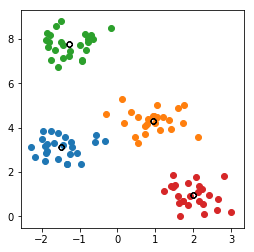

array([1, 2, 1, 1, 1, 1, 0, 2, 1, 2, 2, 2, 2, 2, 2, 3, 3, 0, 0, 3, 1, 2,
       0, 3, 1, 0, 0, 1, 3, 3, 3, 2, 3, 3, 0, 1, 2, 3, 2, 0, 1, 0, 2, 0,
       0, 2, 3, 0, 1, 1, 1, 3, 0, 0, 0, 2, 2, 3, 3, 2, 2, 3, 3, 1, 3, 2,
       0, 0, 3, 1, 2, 3, 1, 2, 1, 1, 0, 0, 3, 3, 3, 2, 0, 1, 3, 0, 3, 3,
       1, 1, 1, 0, 1, 0, 0, 2, 2, 0, 2, 1])

In [210]:
km = ScratchKMeans(n_clusters=4)
km.fit(X)
cluster, distance, sse = km.predict(X)
km.plot_result(X, cluster)
cluster

## 【問題2】エルボー法の実装
K-meansにおいて中心点の個数 
k
 は人為的に決める必要があるが、その判断方法としてエルボー法があります。

SSEを縦軸、クラスタ数 
k
 を横軸にした折れ線グラフを表示します。

このためにK-meansのインスタンスからはSSEを取得できるようにしてください。


In [206]:
n = 30
sse = np.empty((n, 1))
for i in range(1, n):
        km = ScratchKMeans(n_clusters=i)
        km.fit(X)
        clst, d, sse[i] = km.predict(X)
sse

array([[ -1.34967088],
       [870.26117979],
       [351.48372865],
       [346.63563793],
       [ 48.63378321],
       [ 43.00519867],
       [ 39.55192471],
       [ 35.70855897],
       [ 36.15914114],
       [ 28.290455  ],
       [ 29.81827225],
       [ 23.63483129],
       [ 24.11363437],
       [ 21.39633824],
       [ 21.58257458],
       [ 16.53008841],
       [ 14.30570147],
       [ 16.28531765],
       [ 17.90890616],
       [ 13.52140794],
       [ 12.6653117 ],
       [  9.98546075],
       [ 10.31140849],
       [ 10.29474092],
       [  9.09032792],
       [  9.30052679],
       [ 10.13364275],
       [  7.51208123],
       [  9.8365254 ],
       [  7.60776999]])

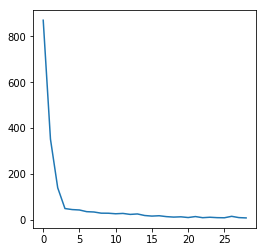

In [186]:
fig, ax = plt.subplots(1, 1, figsize=(4, 4))
ax = plt.plot(sse[1:], label=i)
plt.show()

## 【問題3】（アドバンス課題）シルエット図
この数式を実装し、シルエット図を確認してください。
$$
s_n = \frac{b_n-a_n}{max(b_n,a_n)}
$$
$a_{n}$: 凝集度。同じクラスタ内の他のデータ点との距離の平均値<br>
$b_{n}$: 乖離度。最も近いクラスタ内の全てのデータ点との距離の平均値<br>


In [217]:
#重複を他無くしたcluster
cluster_labels = np.unique(cluster)

#クラスター数
n_clusters = cluster_labels.shape[0]

#Xiから2番目に近いクラスターを取得　（cluster0, 1, 2, 3のうちcluster2が２番目に近ければ(0, 1, 2, 3のうちの1なら) X[i] = [False, False, True, Flase]を返却）
true_for_nearest_cluster = (distance.argsort(axis=1) ==1)

#one hot化の逆をして最も近いクラスターの番号を取得
nearest_cluster = (cluster_labels * true_for_nearest_cluster).sum(axis=1)
print(nearest_cluster)


#X[i]が属するクラスター内の点との距離の一覧を初期化
dist_from_Xi_to_points_in_same_cluster = np.empty(len(X))
#X[i]に最も近いクラスター内の点との距離の一覧を初期化
dist_from_Xi_to_points_in_nearest_cluster =  np.empty(len(X))
a = []
b = []
s = []

for c in range(n_clusters):
        for i in range(len(X)):
                #X[i]が属するクラスター内の点との距離の平均値一覧
                dist_from_Xi_to_points_in_same_cluster[i] = np.mean(np.sqrt(((X[cluster == c] - X[i])**2).sum(axis=1)))

                #X[i]に最も近いクラスター内の点との距離の平均値一覧
                dist_from_Xi_to_points_in_nearest_cluster[i] = np.mean(np.sqrt(((X[nearest_cluster == c] - X[i])**2).sum(axis=1)))
        """
        #平均をとってaと bに保管
        a.append(dist_from_Xi_to_points_in_same_cluster[c].mean())
        b.append(dist_from_Xi_to_points_in_nearest_cluster[c].mean())
        #sを計算
        s.append((b[c] - a[c])/max(a[c], b[c]))
        """
dist_from_Xi_to_points_in_same_cluster
dist_from_Xi_to_points_in_nearest_cluster

[0 1 0 0 0 0 1 1 0 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 0 1 1 0 1 1 1 1 1 1 1 0 1
 1 1 1 0 1 1 1 1 1 1 1 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 0 1 1 0 1
 0 0 1 1 1 1 1 1 1 0 1 1 1 1 0 0 0 1 0 1 1 1 1 1 1 0]


array([nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
       nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
       nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
       nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
       nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
       nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
       nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
       nan, nan, nan, nan, nan, nan, nan, nan, nan])

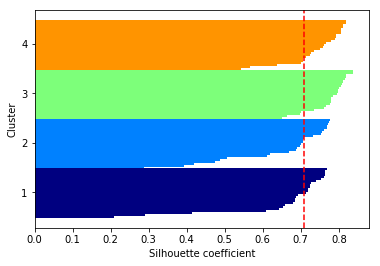

In [213]:
#シルエット図を表示するためのコード
from sklearn.metrics import silhouette_samples
from matplotlib import cm

#シルエット係数
silhouette_vals = silhouette_samples(X,cluster,metric='euclidean')

y_ax_lower, y_ax_upper = 0, 0
yticks = []
for i, c in enumerate(cluster_labels):
    c_silhouette_vals = silhouette_vals[cluster == c]
    c_silhouette_vals.sort()
    y_ax_upper += len(c_silhouette_vals)
    color = cm.jet(i / n_clusters)
    plt.barh(range(y_ax_lower, y_ax_upper), c_silhouette_vals, height=1.0, edgecolor='none', color=color)
    yticks.append((y_ax_lower + y_ax_upper) / 2)
    y_ax_lower += len(c_silhouette_vals)
silhouette_avg = np.mean(silhouette_vals)
plt.axvline(silhouette_avg, color="red", linestyle="--")
plt.yticks(yticks, cluster_labels + 1)
plt.ylabel('Cluster')
plt.xlabel('Silhouette coefficient')
plt.show()

## 【問題4】クラスタ数kの選択
最適だと思われるクラスタ数 
k
 を選択してください。エルボー法やシルエット図を活用する他、人間が後々どう利用したいのかも選択に関わってきます。選択した上で、なぜそれを選んだか説明してください。

エルボー法より、SSEの低下が鈍くなる3 or 4個のクラスター数が適当と思われる。
2変数の場合散布図のグラフの見た目から４つ程度と判断でき、エルボー法やシルエット図からもその妥当性が裏付けられたと言える。
次元が増えて目視判断できない場合にもエルボー法やシルエット図は有効と思われる。




In [1319]:
#read data
import pandas as pd
df = pd.read_csv("/Users/ohmori/diveintocode-ml/diveintocode-term1/sprint/sprint7/Wholesale customers data.csv")
df.head()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,2,3,12669,9656,7561,214,2674,1338
1,2,3,7057,9810,9568,1762,3293,1776
2,2,3,6353,8808,7684,2405,3516,7844
3,1,3,13265,1196,4221,6404,507,1788
4,2,3,22615,5410,7198,3915,1777,5185


In [1320]:
df.describe()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
count,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000
mean,1.322727,2.543182,12000.297727,5796.265909,7951.277273,3071.931818,2881.493182,1524.870455
std,0.468052,0.774272,12647.328865,7380.377175,9503.162829,4854.673333,4767.854448,2820.105937
min,1.000000,1.000000,3.000000,55.000000,3.000000,25.000000,3.000000,3.000000
25%,1.000000,2.000000,3127.750000,1533.000000,2153.000000,742.250000,256.750000,408.250000
50%,1.000000,3.000000,8504.000000,3627.000000,4755.500000,1526.000000,816.500000,965.500000
75%,2.000000,3.000000,16933.750000,7190.250000,10655.750000,3554.250000,3922.000000,1820.250000
max,2.000000,3.000000,112151.000000,73498.000000,92780.000000,60869.000000,40827.000000,47943.000000


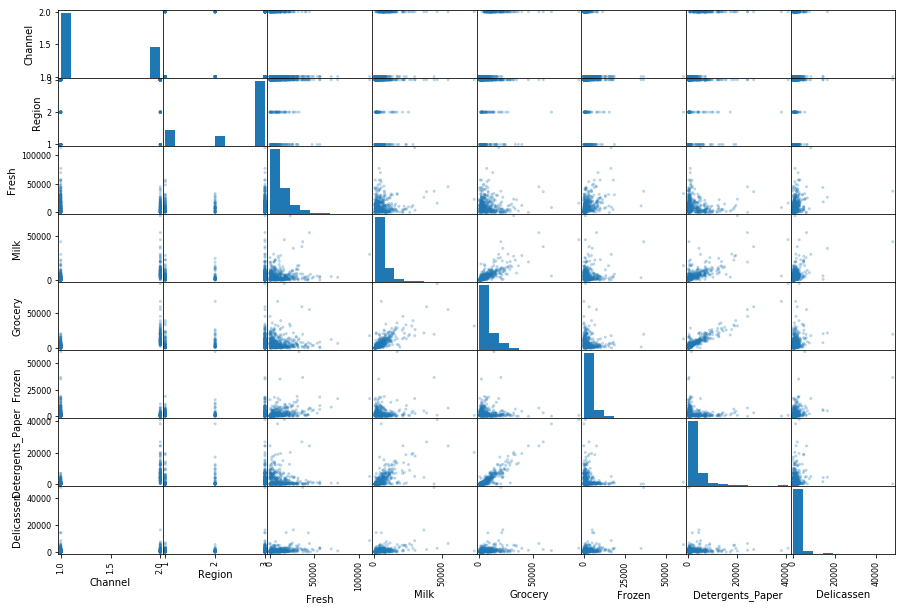

In [979]:
#分布を確認
pd.plotting.scatter_matrix(df, alpha=0.3, figsize=(15, 10));

In [1322]:
#categoricalとcontinuousに分ける
a = ['Fresh', 'Milk', 'Grocery', 'Frozen', 'Detergents_Paper', 'Delicassen']
b = ['Region', 'Channel']
df_a = df.loc[:, a]
df_a[:10]

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,12669,9656,7561,214,2674,1338
1,7057,9810,9568,1762,3293,1776
2,6353,8808,7684,2405,3516,7844
3,13265,1196,4221,6404,507,1788
4,22615,5410,7198,3915,1777,5185
5,9413,8259,5126,666,1795,1451
6,12126,3199,6975,480,3140,545
7,7579,4956,9426,1669,3321,2566
8,5963,3648,6192,425,1716,750
9,6006,11093,18881,1159,7425,2098


In [1323]:
df_b = df.loc[:, b]
df_b[:10]

,Region,Channel
0,3,2
1,3,2
2,3,2
3,3,1
4,3,2
5,3,2
6,3,2
7,3,2
8,3,1
9,3,2


In [1331]:
#continuousは偏っているのでlogをとる
df_a_log = np.log10(df_a)

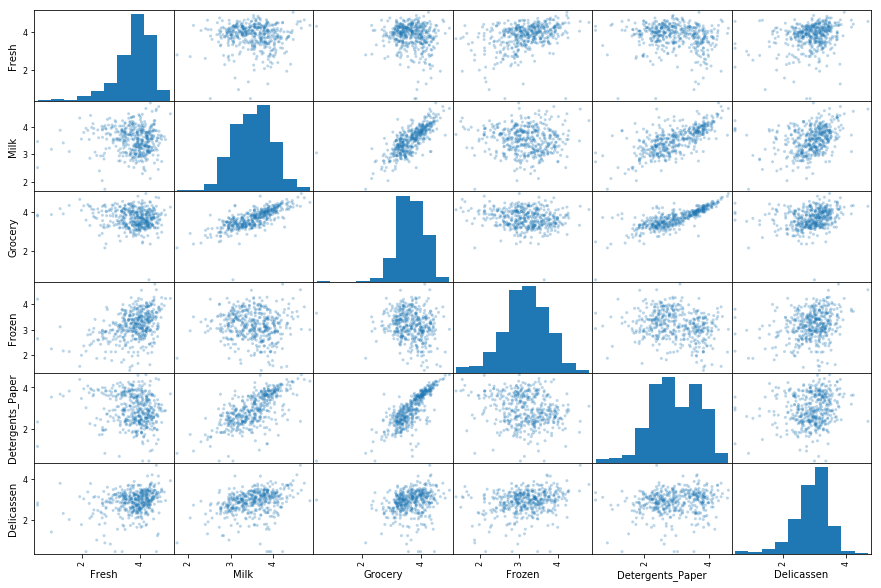

In [1427]:
#分布を確認
pd.plotting.scatter_matrix(df_a_log, alpha=0.3, figsize=(15, 10));

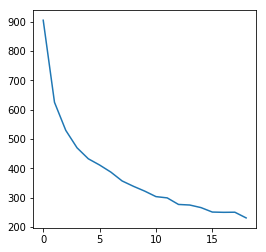

In [1344]:
#エルボー法でk-meansのクラスター数見積もり
#どの辺に変曲点あるかわかりにくい
n = 20
sse = np.empty((n, 1))
for i in range(1, n):
        clf = ScratchKMeans(n_neighbors=i)
        clf.fit(df_a_log)
        cluster, sse[i] = clf.predict(df_a_log)
fig, ax = plt.subplots(1, 1, figsize=(4, 4))
ax = plt.plot(sse[1:], label=i)
plt.show()

[0.44237417 0.71894523 0.83511865 0.93129585 0.97705265 1.        ]


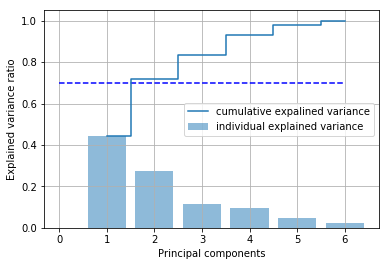

In [1346]:
#PCAの分散説明率を表示
#3個あれば良さそう
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
pca = PCA(n_components=None)
pca = pca.fit(df_a_log)
var_exp = pca.explained_variance_ratio_
cum_var_exp = np.cumsum(var_exp)
print(cum_var_exp)
plt.bar(range(1,7), var_exp, alpha=0.5, align='center', label='individual explained variance')
plt.step(range(1,7), cum_var_exp, where='mid', label='cumulative expalined variance')
plt.ylabel('Explained variance ratio')
plt.xlabel('Principal components')
plt.hlines(0.7, 0, 6,  "blue", linestyles='dashed')
plt.legend(loc='best')
plt.grid()
plt.show()

In [1428]:
#PCAで次元削減
pca = PCA(n_components = 3)
pca = pca.fit(df_a_log)
pca_df_a_log = pca.transform(df_a_log)
print(pca_df_a_log[:10])


[[-0.76044326 -0.03062437 -0.39597189]
 [-0.78188873 -0.37772918  0.09243115]
 [-0.82243908 -0.72814713  0.57278455]
 [ 0.4895858  -0.63319366  0.22789404]
 [-0.34600739 -1.06874039  0.20437029]
 [-0.47069865 -0.17065273 -0.10498749]
 [-0.49188628  0.08755458 -0.56463444]
 [-0.68725963 -0.42048236  0.1574666 ]
 [-0.37862888  0.2591691  -0.22187227]
 [-1.25462601 -0.32185674  0.04963318]]


In [1429]:
#見た目を確認
def fit_predict_plot(X, n=3):    
        clf = ScratchKMeans(n_neighbors=n)
        clf.fit(X)
        cluster, sse = clf.predict(X)
        clf.plot_result(X, cluster)

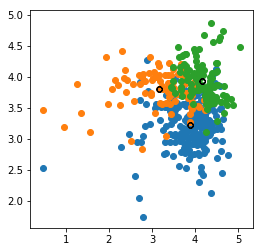

In [1430]:
fit_predict_plot(np.array(new_df))

## 【問題5】既知のグループとの比較
RegionとChannelはK-meansに使用しなかったが、これれらは既知のグループです。クラスタとこれら既知のグループがどう違うかを確認し、説明してください。まずはそれぞれを可視化してください。

## 【問題6】卸売業者にとって有益な情報
卸売業者にとって有益な情報を探し出し文章にまとめてください。

ヒント

前処理を行う前のデータを使い、各クラスタの要約統計量を見るなどしてみましょう。また、PCAで次元削減したデータに対してK-meansを使用しましたが、6個の特徴量をそのまま使ったり、一部の特徴量のみを使ったりということも試してみてください。既知のグループとの比較結果も参考にしてください。

条件ごとにデータを見る際にはPandasのgroupbyが便利です。

pandas.DataFrame.groupby — pandas 0.23.4 documentation

In [1404]:
new_df = pd.concat([df_a_log, df_b], axis=1)
new_df.head()

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen,Region,Channel
0,4.102742,3.984797,3.878579,2.330414,3.427161,3.126456,3,2
1,3.848620,3.991669,3.980821,3.246006,3.517592,3.249443,3,2
2,3.802979,3.944877,3.885587,3.381115,3.546049,3.894538,3,2
3,4.122707,3.077731,3.625415,3.806451,2.705008,3.252368,3,1
4,4.354397,3.733197,3.857212,3.592732,3.249687,3.714749,3,2


In [1405]:
import seaborn as sns
import matplotlib.pyplot as plt

new_df_corr = new_df.corr()
new_df_corr

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen,Region,Channel
Fresh,1.000000,-0.019834,-0.132713,0.383996,-0.155871,0.255186,0.013433,-0.168050
Milk,-0.019834,1.000000,0.758851,-0.055316,0.677942,0.337833,0.034195,0.577156
Grocery,-0.132713,0.758851,1.000000,-0.164524,0.796398,0.235728,0.001466,0.660635
Frozen,0.383996,-0.055316,-0.164524,1.000000,-0.211576,0.254718,-0.085397,-0.244961
Detergents_Paper,-0.155871,0.677942,0.796398,-0.211576,1.000000,0.166735,0.014386,0.724456
Delicassen,0.255186,0.337833,0.235728,0.254718,0.166735,1.000000,-0.012041,0.130466
Region,0.013433,0.034195,0.001466,-0.085397,0.014386,-0.012041,1.000000,0.062028
Channel,-0.168050,0.577156,0.660635,-0.244961,0.724456,0.130466,0.062028,1.000000


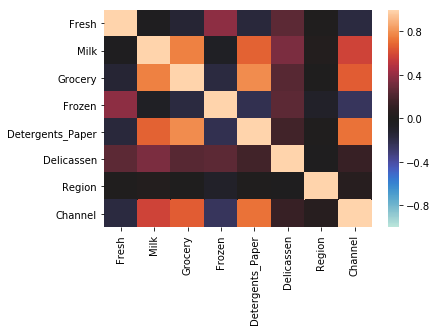

In [1406]:
sns.heatmap(new_df_corr, vmax=1, vmin=-1, center=0)

In [1407]:
abs(new_df_corr.loc['Milk']).sort_values(ascending=False)

Milk                1.000000
Grocery             0.758851
Detergents_Paper    0.677942
Channel             0.577156
Delicassen          0.337833
Frozen              0.055316
Region              0.034195
Fresh               0.019834
Name: Milk, dtype: float64

In [1416]:
clf = ScratchKMeans(n_neighbors=3)
clf.fit(np.array(new_df))
cluster, sse = clf.predict(np.array(new_df))

#クラスターの情報を付与
new_df['Cluster'] = cluster
new_df.head()

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen,Region,Channel,Cluster
0,4.102742,3.984797,3.878579,2.330414,3.427161,3.126456,3,2,2
1,3.848620,3.991669,3.980821,3.246006,3.517592,3.249443,3,2,2
2,3.802979,3.944877,3.885587,3.381115,3.546049,3.894538,3,2,2
3,4.122707,3.077731,3.625415,3.806451,2.705008,3.252368,3,1,0
4,4.354397,3.733197,3.857212,3.592732,3.249687,3.714749,3,2,2


In [1420]:
#各クラスタに分類されたサンプルの数
new_df[['Fresh', 'Cluster']].groupby(['Cluster']).count()

,Fresh
Cluster,
0,234
1,97
2,109


In [1421]:
clustering_1 = new_df.drop(['Region', 'Channel'], axis=1).groupby(['Cluster']).mean()
count_1 = np.array(new_df[['Cluster', 'Region']].groupby(['Cluster']).count())
clustering_1['Count'] = count_1

In [1422]:
clustering_1

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen,Count
Cluster,,,,,,,
0,3.876011,3.226751,3.329537,3.242780,2.417513,2.801868,234
1,3.164380,3.794355,4.049041,2.696054,3.638077,2.620296,97
2,4.168664,3.933350,4.047253,3.439384,3.469148,3.337904,109


* 生鮮品（Fresh）<br>
    Cluster 1, 2, 3は年間消費額が他よりも大きい
    Cluster 4は他よりも年間消費額が最大で10^1.2 = 15倍程度小さい
 
 * 乳製品（Milk）<br>
     Cluster 1, 2, 4は年間消費額が10^0.5 = 3倍程度は他よりも大きい
     Cluster 3は他よりも年間消費額が最大で10^0.8 = 6倍程度小さい
     
 
 * 日用品（Grocery）<br>
     Cluster 1, 2, 4は年間消費額が10^0.5 = 3倍程度は他よりも大きい
     Cluster 3, 5は年間消費額が他よりも最大で10^0.8 = 6倍程度小さい


 * 冷凍品（Frozen）<br>
     Cluster 0, 2, 3は年間消費額が他よりも10^0.4 = 2.5倍程度は他よりも大きい
     Cluster 4, 5は年間消費額が他よりも最大で10^1.8 = 10倍程度小さい


 * 洗剤、紙（Detergents, Paper）<br>
     Cluster 1, 4は年間消費額が他よりも10^0.7 = 5倍程度は他よりも大きい
     Cluster 5は年間消費額が他よりも桁が最大で10^1.5 = 30倍程度小さい


 * 惣菜（Delicassen）<br>
     Cluster 2は年間消費額が他よりも10^0.5 = 3倍程度は他よりも大きい

In [1423]:
#fleshを売り込むために販売額の大きいCluster 2に着目
#region3とchannel 2が多そう
new_df[new_df['Cluster'] == 2]

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen,Region,Channel,Cluster
0,4.102742,3.984797,3.878579,2.330414,3.427161,3.126456,3,2,2
1,3.848620,3.991669,3.980821,3.246006,3.517592,3.249443,3,2,2
2,3.802979,3.944877,3.885587,3.381115,3.546049,3.894538,3,2,2
4,4.354397,3.733197,3.857212,3.592732,3.249687,3.714749,3,2,2
7,3.879612,3.695131,3.974327,3.222456,3.521269,3.409257,3,2,2
9,3.778585,4.045049,4.276025,3.064083,3.870696,3.321805,3,2,2
10,3.527114,3.732635,4.113074,3.643453,3.776483,3.241546,3,2,2
12,4.501251,4.090575,4.070297,2.457882,3.588944,3.467016,3,2,2
13,4.326684,3.792952,4.175570,3.490661,3.826528,2.779596,3,2,2
14,4.391870,3.976121,4.082462,2.468347,3.703979,3.336059,3,2,2


In [1424]:
#Cluster 2に着目
#Channel 1の購買力が高い
new_df[new_df['Cluster'] == 2][['Channel', 'Region', 'Fresh']].groupby(['Channel', 'Region']).mean()

Fresh
Channel Region          
1       1       4.396364
        2       4.514773
        3       4.372793
2       1       3.976958
        2       4.099816
        3       4.046751

In [1426]:
#Region別の購買力

#特別差がない
new_df.groupby(['Region']).mean()

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen,Channel,Cluster
Region,,,,,,,,
1,3.797705,3.507541,3.629690,3.258611,2.901748,2.912156,1.233766,0.636364
2,3.709267,3.474301,3.779632,3.228281,3.017981,2.886783,1.404255,0.531915
3,3.802396,3.539477,3.657881,3.141071,2.947623,2.891527,1.332278,0.762658


In [1106]:
#Channel別の購買力
#Freshも含めて各商材の購買力がChannelによって異なる。
#FreshはChannel 1の方が売れる
new_df.groupby(['Channel']).mean()

,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen,Cluster
Channel,,,,,,,,
1,2.510067,3.866108,3.340033,3.445143,3.265182,2.573753,2.843419,2.412752
2,2.612676,3.635321,3.919137,4.129343,2.973214,3.730634,3.002103,1.922535


In [1102]:
#RegionとChannel別の購買力
new_df.groupby(['Region', 'Channel']).mean()

Fresh      Milk   Grocery    Frozen  Detergents_Paper  \
Region Channel                                                             
1      1        3.909251  3.368636  3.457543  3.289251          2.630800   
       2        3.432082  3.962843  4.193949  3.158179          3.789853   
2      1        3.778760  3.227366  3.557138  3.395920          2.512206   
       2        3.606856  3.838205  4.107519  2.981234          3.763334   
3      1        3.865636  3.346987  3.426814  3.241102          2.565969   
       2        3.675313  3.926289  4.122217  2.940055          3.714564   

                Delicassen   Cluster  
Region Channel                        
1      1          2.847384  0.016949  
       2          3.124463  1.333333  
2      1          2.889356  1.535714  
       2          2.882990  2.052632  
3      1          2.836214  3.199052  
       2          3.002681  2.000000

## 【問題7】（アドバンス課題）他の手法の調査
今回扱ったK-means以外に非階層クラスタリングで有名な手法としては DBSCAN 、
PCA以外に次元削減手法で有名な手法としては t-SNE や LLE があります。

DBSCANのメリット・デメリット
t-SNE、LLEのメリット・デメリット
について記述してください。

DBSCAN
* メリット：
    * 事前にデータのクラスタ数を指定しなくて良い
    * クラスタを、その形状に左右されずに見つけることができる（K-meansだと、例えば同心円上に広がる２つの半径の異なるリングの集合◎は区別できない）
    * ノイズ（外れ値）に対して強い

* デメリット: 
    * 密度に大きな違いがあるクラスタを分類できない
    * 次元が大きくなると、収束しにくい

## 【問題8】（アドバンス課題）t-SNEとDBSCANの利用
Wholesale customersのデータに対して、PCAではなく、 t-SNE を用いて次元削減をしてください。さらにK-meansではなく、 DBSCAN を用いてクラスタリングしてください。

そのクラスタリング結果をPCA+kmeansの場合の結果と比較してみましょう。実装にはscikit-learnを用いてください。

sklearn.manifold.TSNE — scikit-learn 0.20.2 documentation

sklearn.cluster.DBSCAN — scikit-learn 0.20.2 documentation

パラメーターチューニング

これらはK-meansやPCAに比べパラメーターチューニングが難しい手法です。scikit-learnのドキュメントと共に論文も参考にしながらパラメータの意味を確認することも大切になります。

t-SNEの論文

DBSCANの論文

5.ディスカッション

## 【問題9】教師なし学習と教師あり学習
最終発表時に以下の内容についてディスカッションを行います。自分なりの意見を用意しておいてください。

教師なし学習は教師あり学習とどのような違いがあるか